In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML
from tqdm.notebook import tqdm

# Gabor Filter Bank

$$
g(x,y,\lambda,\phi,\psi,\sigma,\gamma) = 
e^{\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)}
e^{\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)}
$$

where
$$x' = x\cos(\theta) + y\sin(\theta)$$
and
$$y' = -x \sin(\theta) + y\cos(\theta)$$

In vectorial form:

In [2]:
def gabor(x,y,lam,theta,psi,sigma,gamma,do_norm=False):
    # lambda = wavelenght
    # theta = orientation
    # psi = phase
    # sigma = scale / standard deviation
    # gamma = spatial ratio / ellipticy
    
    """Gabor feature extraction.
    from wikipeda/Gabor_filter
    """
    
    # Rotation
    xr = x * np.cos(theta) + y * np.sin(theta)
    yr = -x * np.sin(theta) + y * np.cos(theta)
  
    gb = np.exp(-(xr**2 + (yr**2)*gamma**2)/(2*sigma**2)) \
        * np.exp(1j*(2*np.pi*xr/lam + psi))
    
    if do_norm:
        gb = gb / np.max(np.abs(gb))

    return gb

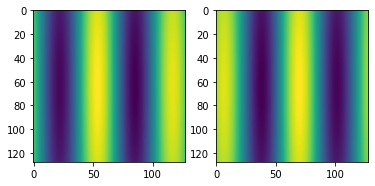

In [3]:
(x, y) = np.meshgrid(np.linspace(-1, 1,128), np.linspace(-1, 1, 128))

freq = 1
ang = np.deg2rad(0)
phase = 1
scale = 2
ellipticy = 1

gb = gabor(x,y,freq,ang,phase,scale,ellipticy)


plt.subplot(121)
plt.imshow(np.real(gb))
plt.subplot(122)
plt.imshow(np.imag(gb))
plt.show()

In [4]:
(x, y) = np.meshgrid(np.linspace(-1, 1,128), np.linspace(-1, 1, 128))

fig, (ax1, ax2) = plt.subplots(1,2)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
step = 5
scale = 20

F = 30
freqs = np.logspace(0,1,F)
print(freqs)

for i in tqdm(freqs):
    
    freq = 1/(i+1e-20)
    ang = np.deg2rad(0)
    phase = 1
    scale = 1
    ellipticy = 1

    gb = gabor(x,y,freq,ang,phase,scale,ellipticy)
    
    im1 = ax1.imshow(np.real(gb))
    im2 = ax2.imshow(np.imag(gb))
        
    ims.append([im1, im2])
plt.close()

print('Converting to video', end='... ')
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
print('Done')

# Show the animation
HTML(ani.to_html5_video())

[ 1.          1.08263673  1.1721023   1.268961    1.3738238   1.48735211
  1.61026203  1.74332882  1.88739182  2.04335972  2.21221629  2.39502662
  2.5929438   2.8072162   3.03919538  3.29034456  3.56224789  3.85662042
  4.17531894  4.52035366  4.89390092  5.29831691  5.73615251  6.21016942
  6.72335754  7.27895384  7.88046282  8.53167852  9.23670857 10.        ]


  0%|          | 0/30 [00:00<?, ?it/s]

Converting to video... Done


In [5]:
(x, y) = np.meshgrid(np.linspace(0, 1,128), np.linspace(0, 1, 128))

fig, (ax1, ax2) = plt.subplots(1,2)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
step = 5
scale = 20

F = 30
freqs = np.logspace(0,1,F)
print(freqs)

for i in tqdm(freqs):
    
    freq = 1/(i+1e-20)
    ang = np.deg2rad(0)
    phase = 1
    scale = 1
    ellipticy = 1

    gb = gabor(x,y,freq,ang,phase,scale,ellipticy)
    
    im1 = ax1.imshow(np.real(gb))
    im2 = ax2.imshow(np.imag(gb))
        
    ims.append([im1, im2])
plt.close()

print('Converting to video', end='... ')
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
print('Done')

# Show the animation
HTML(ani.to_html5_video())

[ 1.          1.08263673  1.1721023   1.268961    1.3738238   1.48735211
  1.61026203  1.74332882  1.88739182  2.04335972  2.21221629  2.39502662
  2.5929438   2.8072162   3.03919538  3.29034456  3.56224789  3.85662042
  4.17531894  4.52035366  4.89390092  5.29831691  5.73615251  6.21016942
  6.72335754  7.27895384  7.88046282  8.53167852  9.23670857 10.        ]


  0%|          | 0/30 [00:00<?, ?it/s]

Converting to video... Done


In [6]:
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm.notebook import tqdm


(x, y) = np.meshgrid(np.linspace(-1, 1,128), np.linspace(-1, 1, 128))

fig, (ax1, ax2) = plt.subplots(1,2)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
step = 5
scale = 20

A = 30
angles = np.linspace(0,360,A)

for ang in tqdm(angles):
    
    freq = 1/5
    ang = ang
    phase = 0
    scale = 1
    ellipticy = 0

    gb = gabor(x,y,freq,ang,phase,scale,ellipticy)
    
    im1 = ax1.imshow(np.real(gb))
    im2 = ax2.imshow(np.imag(gb))
        
    ims.append([im1, im2])

print('Converting to video', end='... ')
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

print('Done')
plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/30 [00:00<?, ?it/s]

Converting to video... Done


In [7]:
(x, y) = np.meshgrid(np.linspace(0, 1,128), np.linspace(0, 1, 128))

fig, (ax1, ax2) = plt.subplots(1,2)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
step = 5
scale = 20

P = 30
phases = np.linspace(0,10,P)

for phs in tqdm(phases):
    
    freq = 1/5
    ang = 60
    phase = phs
    scale = 1
    ellipticy = 0

    gb = gabor(x,y,freq,ang,phase,scale,ellipticy)
    
    im1 = ax1.imshow(np.real(gb))
    im2 = ax2.imshow(np.imag(gb))
        
    ims.append([im1, im2])

print('Converting to video', end='... ')
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

print('Done')
plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/30 [00:00<?, ?it/s]

Converting to video... Done


In [8]:
(x, y) = np.meshgrid(np.linspace(-1, 1,128), np.linspace(-1, 1, 128))

fig, (ax1, ax2) = plt.subplots(1,2)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

S = 100
scales = np.linspace(1,10,S)

for scl in tqdm(scales):
    
    freq = 1/5
    ang = 60
    phase = 1
    scale = 1/scl
    ellipticy = 0

    gb = gabor(x,y,freq,ang,phase,scale,ellipticy)
    
    im1 = ax1.imshow(np.real(gb))
    im2 = ax2.imshow(np.imag(gb))
        
    ims.append([im1, im2])

print('Converting to video', end='... ')
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

print('Done')
plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/100 [00:00<?, ?it/s]

Converting to video... Done


In [9]:
(x, y) = np.meshgrid(np.linspace(-1, 1,128), np.linspace(-1, 1, 128))

fig, (ax1, ax2) = plt.subplots(1,2)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

E = 100
ellipticies = np.linspace(-100,100,S)

for ell in tqdm(ellipticies):
    
    freq = 1/5
    ang = 60
    phase = 1
    scale = 1/5
    ellipticy = ell

    gb = gabor(x,y,freq,ang,phase,scale,ellipticy)
    
    im1 = ax1.imshow(np.real(gb))
    im2 = ax2.imshow(np.imag(gb))
        
    ims.append([im1, im2])

print('Converting to video', end='... ')
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

print('Done')
plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/100 [00:00<?, ?it/s]

Converting to video... Done


In [20]:
D = 1
nfeatures = 1000
img_res = 128

freqs =  np.random.normal(0,10,size=(nfeatures,D)) # in [0,+inf]
freqs = 1/freqs
angles = np.random.uniform(0,359,size=(nfeatures,D)) # in [0,359]
angles = np.deg2rad(angles)
phases = np.random.uniform(-1,1,size=(nfeatures,D)) # in [-1,1]
scales = np.random.uniform(1e-10,10,size=(nfeatures,D)) # in (0,10]
scales = 1/scales
ellipticies = np.random.normal(0,1,size=(nfeatures,D)) # [0, +inf]

(x, y) = np.meshgrid(np.linspace(-1, 1, img_res), np.linspace(-1, 1, img_res))

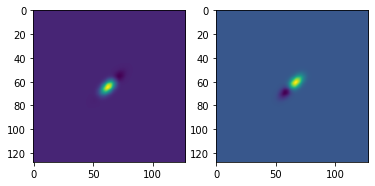

In [21]:
f = 1
gb = gabor(x,y,freqs[f],angles[f],phases[f],scales[f],ellipticies[f],do_norm=True)
    
plt.subplot(121)
plt.imshow(np.real(gb))
plt.subplot(122)
plt.imshow(np.imag(gb))
plt.show()

In [158]:
for f in range(100):
    gb = gabor(x,y,freqs[f],angles[f],phases[f],scales[f],ellipticies[f],do_norm=True)

    
    plt.subplot(121)
    plt.imshow(np.real(gb))
    plt.subplot(122)
    plt.imshow(np.imag(gb))
    print(freqs[f], angles[f], phases[f], scales[f], ellipticies[f])
    plt.show()

ValueError: operands could not be broadcast together with shapes (128,128) (2,) 

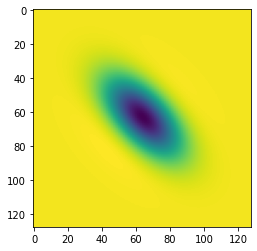

In [32]:
freq = 0.5
angle = 1.11
phase = 3
scale = 0.25
ellip = 0.62187836

gb = gabor(x,y,freq,angle,phase,scale,ellip,do_norm=True)
plt.imshow(np.real(gb))

(128, 128, 2)
(128, 128, 100)


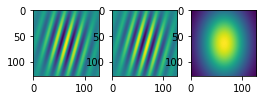

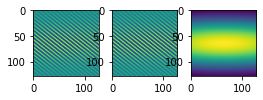

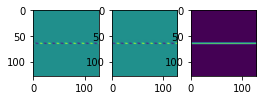

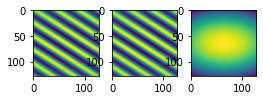

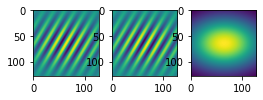

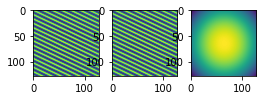

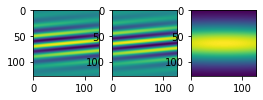

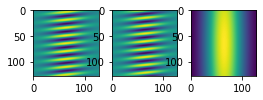

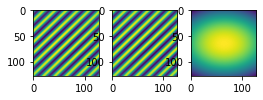

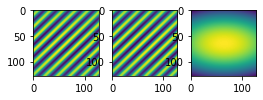

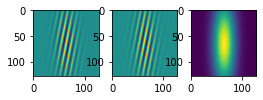

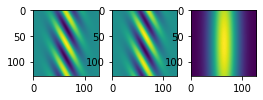

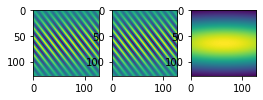

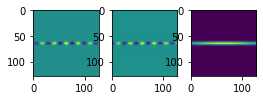

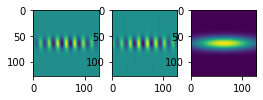

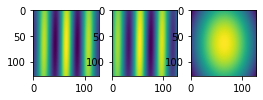

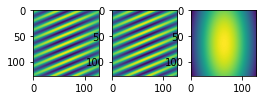

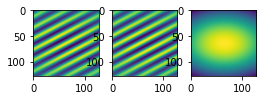

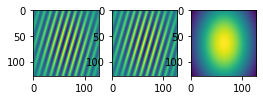

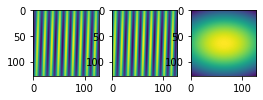

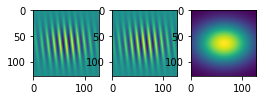

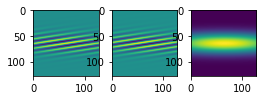

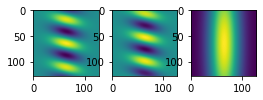

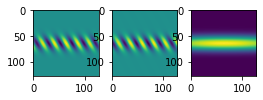

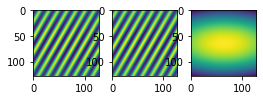

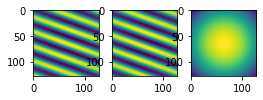

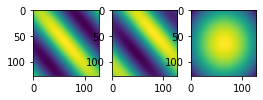

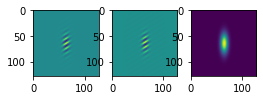

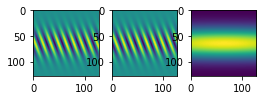

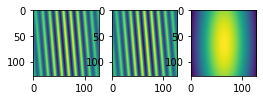

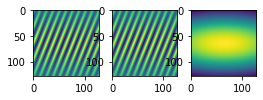

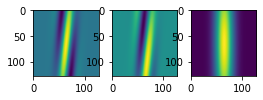

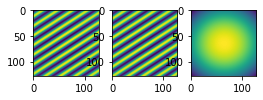

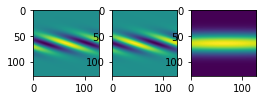

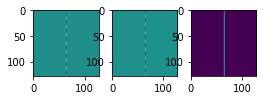

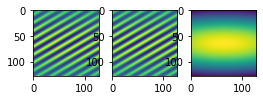

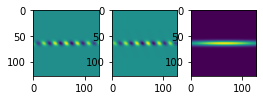

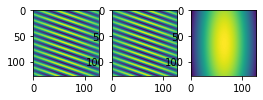

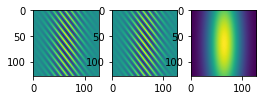

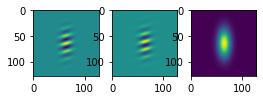

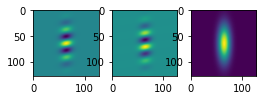

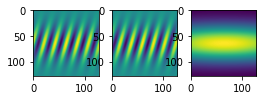

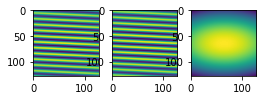

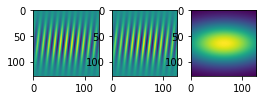

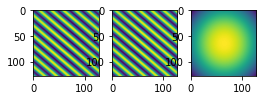

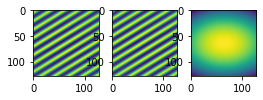

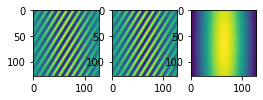

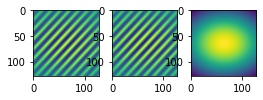

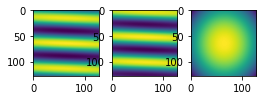

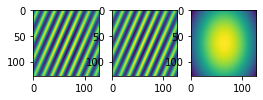

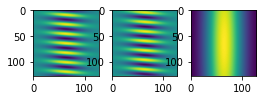

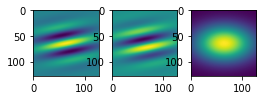

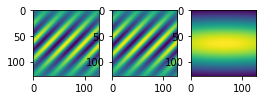

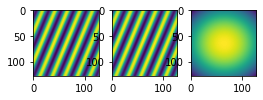

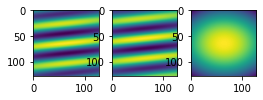

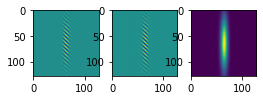

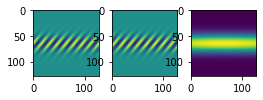

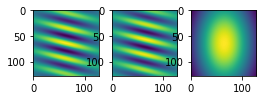

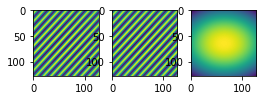

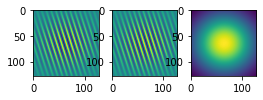

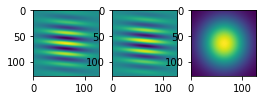

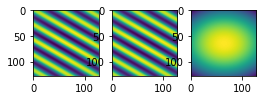

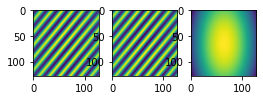

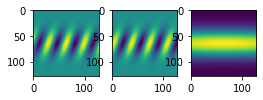

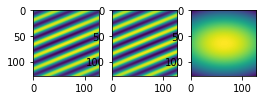

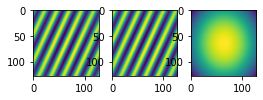

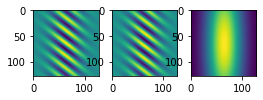

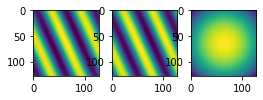

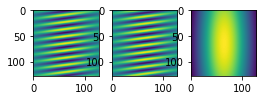

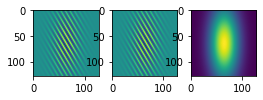

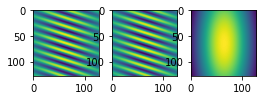

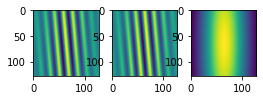

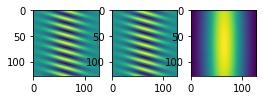

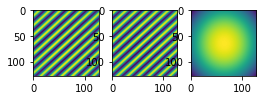

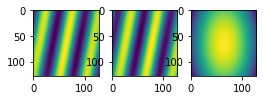

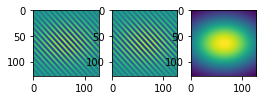

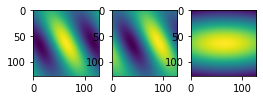

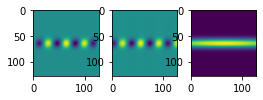

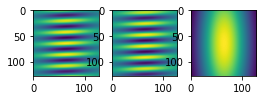

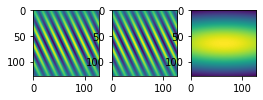

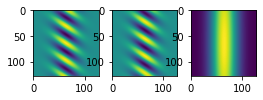

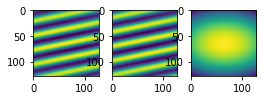

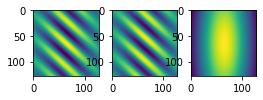

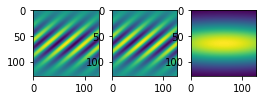

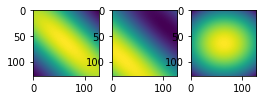

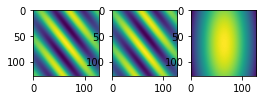

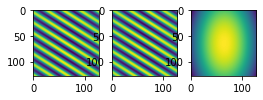

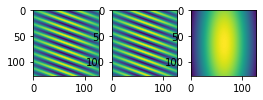

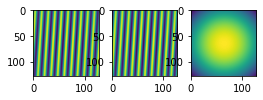

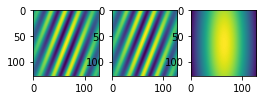

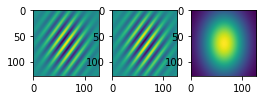

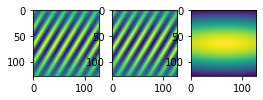

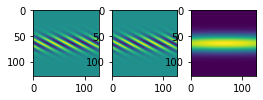

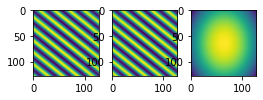

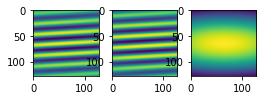

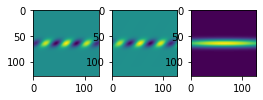

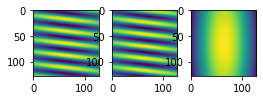

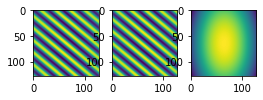

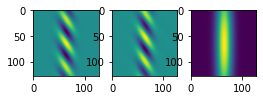

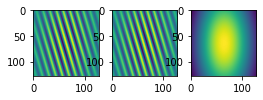

In [171]:
# alternative formulation according to 
# http://kgeorge.github.io/2016/02/04/understanding-gabor-filter

def gabor_features(X, freqs, sigma):
    
    assert sigmas.shape[-1] == freqs.shape[-1] == X.shape[-1] == 2
    
    scales = 1 / (2*np.pi*sigmas[:,0]*sigmas[:,1])
    inv_scales = 1/(sigmas**2)
    arg_exp1 = -0.5*((X**2) @ inv_scales.T)
    arg_exp2 = -1j*2*(X @ freqs.T)
    return scales*np.exp(arg_exp1)*np.exp(arg_exp2)

coords = np.linspace(-1, 1, 128, endpoint=False)
X = np.stack(np.meshgrid(coords, coords), -1)

print(X.shape)

nfeatures = 100
ndim = X.shape[-1]

freqs =  np.random.normal(0,10,size=(nfeatures,ndim)) # in [-inf,+inf]
sigmas = np.random.uniform(0,3,size=(nfeatures,ndim)) # in [0, 5]

filters = gabor_features(X,freqs,sigmas)
print(filters.shape)

for f in range(nfeatures):
    fig, axarr = plt.subplots(1,3,figsize=(4,2))
    axarr[0].imshow(np.real(filters[:,:,f]))
    axarr[1].imshow(np.imag(filters[:,:,f]))
    axarr[2].imshow(np.abs(filters[:,:,f]))
    plt.show()